<Axes: xlabel='ROK'>

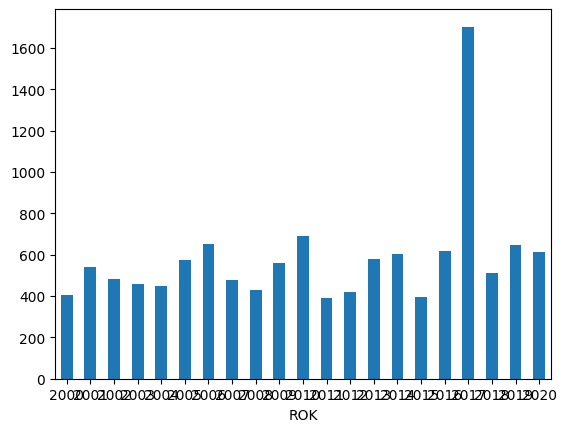

In [62]:
import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

df = pd.read_csv(url,sep=";")

df["ROK"] = pd.to_datetime(df["DATE"]).dt.year

df = df.groupby(by=["ROK","NAME"],as_index=False)["PRCP"].sum()
df = df.set_index("ROK")

df_turany = df.loc[df["NAME"]=="TURANY","PRCP"]
df_ruzyne = df.loc[df["NAME"]=="RUZYNE","PRCP"]

df_turany.plot.bar()
df_ruzyne.plot()




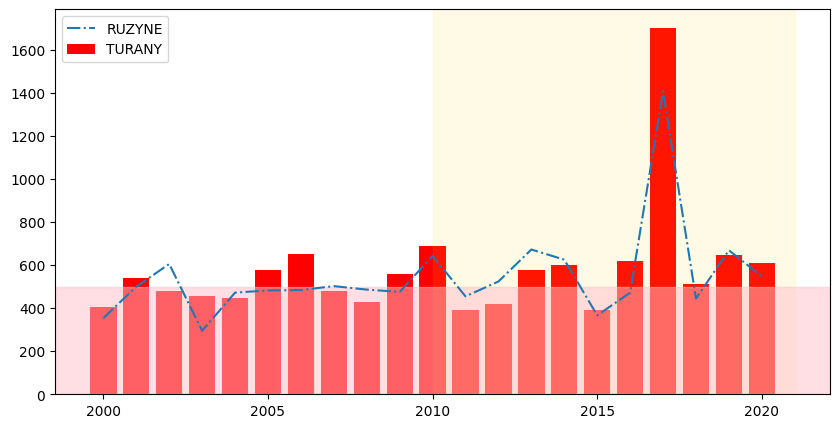

In [63]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_ruzyne.index,df_ruzyne,label="RUZYNE",linestyle="dashdot")
ax.bar(df_turany.index,df_turany,label="TURANY",color="red")

ax.axvspan(2010,df_ruzyne.index.max()+1,color="gold",alpha=0.1)
ax.axhspan(0,500,color="pink",alpha=0.5)

plt.legend()
plt.show()




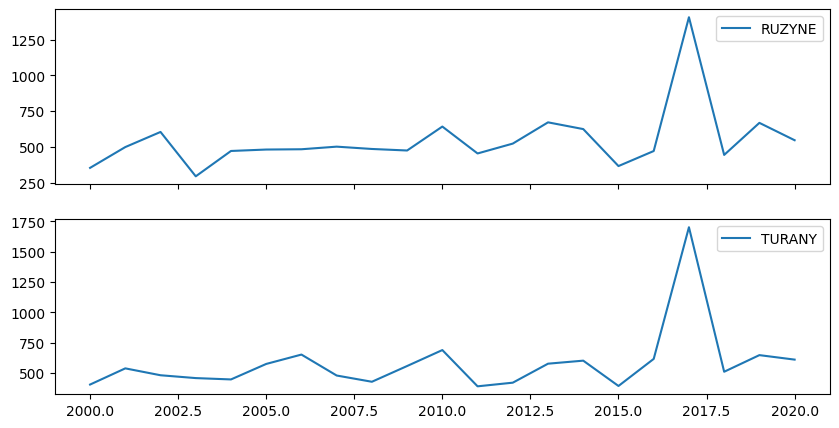

In [64]:
from matplotlib import pyplot as plt


fig, ax= plt.subplots(2,1,figsize=(10,5),sharex=True)


ax[0].plot(df_ruzyne.index,df_ruzyne,label="RUZYNE")
ax[1].plot(df_turany.index,df_turany,label="TURANY")

ax[0].legend()
ax[1].legend()
fig.savefig("mojeprvnigrafy.png")

plt.show()


In [65]:
import requests
import pandas as pd

data = requests.get("https://randomuser.me/api/").json()

# data = data["results"]

# df = pd.json_normalize(data)

# g = data[0]["gender"]



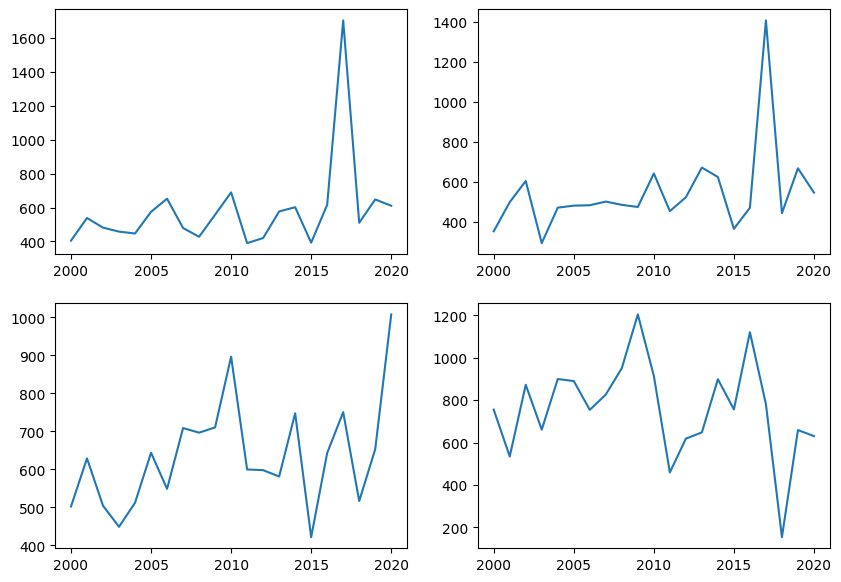

In [66]:


fig, ax = plt.subplots(2,2,figsize=(10,7))

ax[0,0].plot(df_turany.index,df_turany,label="TURANY")
ax[0,1].plot(df_ruzyne.index,df_ruzyne,label="RUZYNE")
ax[1,0].plot(df.loc[df["NAME"]=="MOSNOV"].index,df.loc[df["NAME"]=="MOSNOV","PRCP"],label="MOSNOV")
ax[1,1].plot(df.loc[df["NAME"]=="GRAZ"].index,df.loc[df["NAME"]=="GRAZ","PRCP"],label="GRAZ")

plt.show()

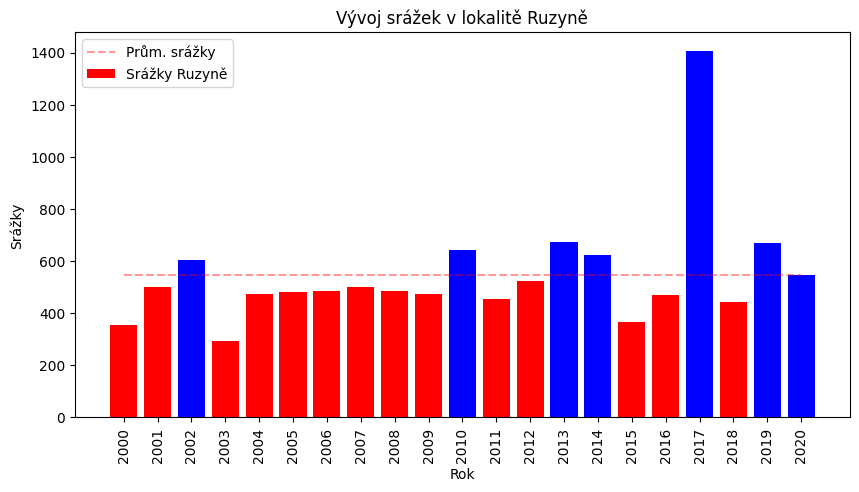

In [83]:

fig, ax = plt.subplots(figsize=(10,5))
prumerne_srazky = df_ruzyne.mean()

prumery = [prumerne_srazky] * len(df_ruzyne)

barvy = ["red" if x < prumerne_srazky else "blue" for x in df_ruzyne]
ax.bar(df_ruzyne.index,df_ruzyne,label="Srážky Ruzyně",color=barvy)
ax.plot(df_ruzyne.index,prumery,linestyle="dashed",color="red",alpha=0.4,label="Prům. srážky")

ax.set_title("Vývoj srážek v lokalitě Ruzyně")
ax.set_xlabel("Rok")
ax.set_ylabel("Srážky")
ax.set_xticks(df_ruzyne.index)
plt.xticks(rotation=90)

plt.legend()
plt.show()

C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_32228\1337620008.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


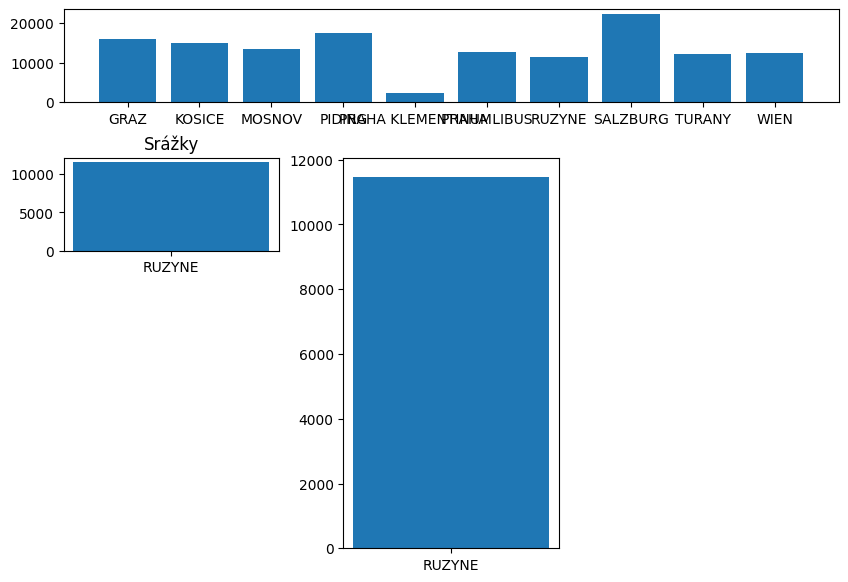

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

df = pd.read_csv(url,sep=";")

df["ROK"] = pd.to_datetime(df["DATE"]).dt.year

df_agg_lokality = df.groupby(by="NAME")["PRCP"].sum()
df_agg_ruzyne = df_agg_lokality.loc[df_agg_lokality.index=="RUZYNE"]

fig = plt.figure(figsize=(10,7))

gs = gridspec.GridSpec(4, 3,                # Mřížka 4 řádky × 3 sloupce
                      hspace=0.6,           # Větší vertikální mezery (50%) - zabrání překrývání
                      wspace=0.3)    

ax1 = fig.add_subplot(gs[0,:]) # přes 1 řádek a všechny sloupce
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1:,1])

ax1.bar(df_agg_lokality.index,df_agg_lokality)
ax2.bar(df_agg_ruzyne.index,df_agg_ruzyne)
ax3.bar(df_agg_ruzyne.index,df_agg_ruzyne)

ax2.set_title("Srážky")

plt.tight_layout()

plt.show()




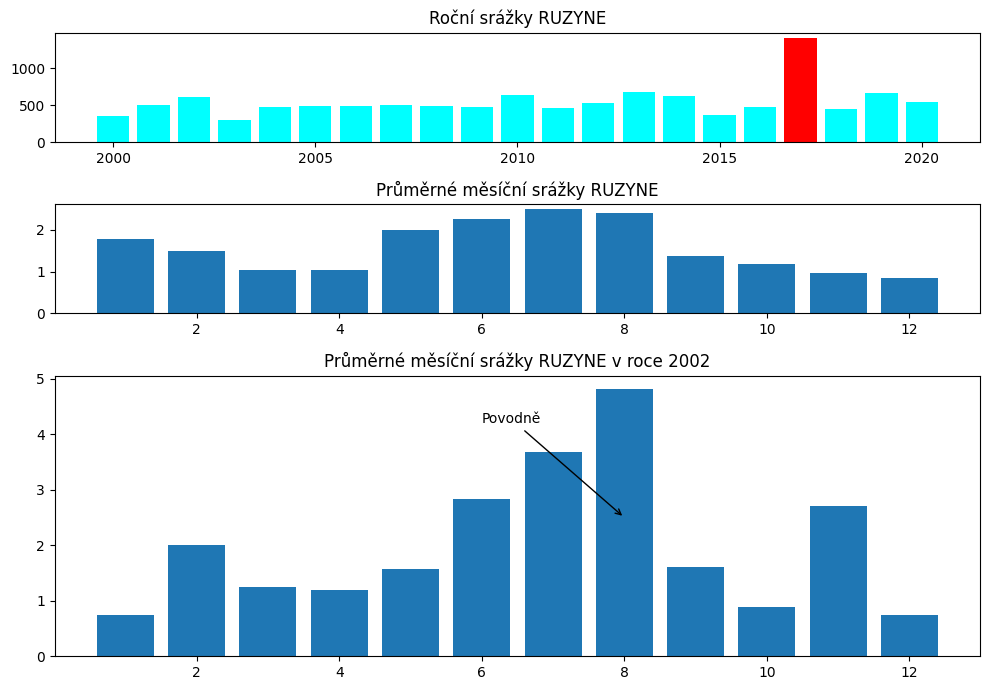

In [25]:
# 2002 povodně v Praze

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

df = pd.read_csv(url,sep=";")

df["ROK"] = pd.to_datetime(df["DATE"]).dt.year
df["MESIC"] = pd.to_datetime(df["DATE"]).dt.month

'''
1. Roční sumu srážek v RUZYNE (přes 1 řádek a 1 sloupec)
2. Průměrné měsíční srážky v RUZYNE (přes 1 řádek a 1 sloupec)
3. Průměrné měsíční srážky v RUZYNE v 2002 (přes 2 řádky a  1 sloupec)

- každý graf bude mít nadpis
- maximální roční srážky v RUZYNE (graf 1 bude mít barvu red, ostatní cyan)
'''

rocni_srazky_ruzyne = df.loc[df["NAME"]=="RUZYNE"].groupby(by="ROK",as_index=False)["PRCP"].sum()
mesicni_srazky_ruzyne = df.loc[df["NAME"]=="RUZYNE"].groupby(by="MESIC",as_index=False)["PRCP"].mean()

mesicni_srazky_ruzyne_2002 = df.loc[(df["NAME"]=="RUZYNE")&(df["ROK"]==2002)].groupby(by="MESIC",as_index=False)["PRCP"].mean()
max_rocni_srazky_ruzyne = rocni_srazky_ruzyne["PRCP"].max()

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(4,1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2:,0])

ax1.bar(rocni_srazky_ruzyne["ROK"],rocni_srazky_ruzyne["PRCP"],color=["red" if x == max_rocni_srazky_ruzyne else "cyan" for x in rocni_srazky_ruzyne["PRCP"] ])
ax2.bar(mesicni_srazky_ruzyne["MESIC"],mesicni_srazky_ruzyne["PRCP"])
ax3.bar(mesicni_srazky_ruzyne_2002["MESIC"],mesicni_srazky_ruzyne_2002["PRCP"])

ax1.set_title("Roční srážky RUZYNE")
ax2.set_title("Průměrné měsíční srážky RUZYNE")
ax3.set_title("Průměrné měsíční srážky RUZYNE v roce 2002")

ax3.annotate(
    "Povodně",
    xy = (8,2.5) # kam jde šipka
    ,xytext =  (6,4.2) # odkud jde šipka
    ,arrowprops= dict(arrowstyle= "->",color="black",lw=1) # styl čáry šipky

)

plt.tight_layout()
plt.show()


In [28]:
import plotly.express as px


fig = px.line(rocni_srazky_ruzyne,x="ROK",y="PRCP")

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed